<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

### K-Nearest Neighbour (KNN): Classification, Regression, Imputation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
X = load_iris().data
y = load_iris().target

In [4]:
X = X[:, [2,3]]

In [5]:
X.shape

(150, 2)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(120, 2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=9,weights="uniform")

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [11]:
from mlxtend.plotting import plot_decision_regions

C:\Users\atish\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


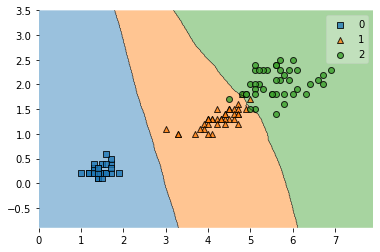

In [12]:
plot_decision_regions(X_train, y_train, knn)
plt.show()

In [13]:
y_predicted = knn.predict(X_test)

In [14]:
y_predicted

array([2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0])

In [15]:
y_test

array([2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
confusion_matrix(y_test, y_predicted)

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]], dtype=int64)

In [18]:
accuracy_score(y_test, y_predicted)

0.9666666666666667

In [19]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Data Imputation

In [20]:
from sklearn.impute import KNNImputer

In [21]:
X[0, 1] = np.nan

In [22]:
X[0]

array([1.4, nan])

In [23]:
imputer = KNNImputer(n_neighbors=7)

In [24]:
imputer.fit(X)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=7, weights='uniform')

In [25]:
X_filled = imputer.transform(X)

In [26]:
X_filled[0]

array([1.4       , 0.17142857])

#### Regression

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = boston.data
y = boston.target

In [32]:
X.shape

(506, 13)

In [33]:
X = StandardScaler().fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=5, weights="distance")

In [37]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [38]:
y_pred = knn.predict(X_test)

In [39]:
y_test

array([17. ,  7.2, 14.5, 28. , 21.5, 19.9, 18.9, 23.8, 10.2, 19.1, 27.5,
       20.8,  6.3, 18.6, 24.4, 22.6, 22.8,  8.4, 24.5,  7.2, 28.7, 16.1,
       21.7, 24.7, 23.7, 20. , 22.5, 19.4, 10.5, 18.8, 29. , 22.4, 14.5,
       18.5, 18.9, 27.1, 23.7, 48.5, 36.4, 23.1, 25. , 16. , 16.8, 31.1,
       18.4, 21.9, 28.2, 14. , 19.6, 18.2, 10.8, 14.9, 19.1, 13.4, 33.1,
       27.5, 11.8, 10.2, 50. , 33.4, 20.2, 15.2, 21.4, 14.1, 20. , 15.4,
       23. , 13.8, 21.5, 46.7, 21. , 23.4, 15.3, 18.5, 17.7, 20.8, 44. ,
       22. , 24.4, 28.7, 16.2, 17.5, 22.7, 19.1, 23.1, 50. , 20.4, 29.6,
       18.9, 20. , 21.7, 12.6, 33.2, 23.1, 50. , 19.9, 22. , 42.3, 43.8,
       15.7, 18.5, 21.2])

In [40]:
y_pred

array([23.69478807, 13.44408456, 14.5019255 , 26.35172624, 22.61086113,
       19.85092854, 20.37815295, 22.54149862, 12.04762217, 21.9831915 ,
       22.67183447, 21.43377298, 12.30308445, 22.98125217, 23.83590404,
       23.95372383, 28.36481476, 11.23418566, 23.10216029,  9.05922126,
       26.26889606, 21.82718522, 24.32553823, 21.55027174, 25.09049893,
       20.96768485, 21.65116678, 17.23229619,  8.98326408, 20.15583793,
       24.64386707, 22.57693858, 17.59599687, 18.5579212 , 18.6204334 ,
       16.79111783, 21.87237681, 39.14720324, 33.6249364 , 21.68120789,
       24.06159022, 19.10327321, 29.74840511, 28.33310484, 17.60877601,
       38.69459611, 30.63462435, 15.93184576, 19.76747834, 18.55135287,
       15.09571841, 15.32578435, 14.86339706, 13.25566385, 33.2328674 ,
       24.98954837, 15.30414853, 14.20928226, 39.37998881, 30.82266385,
       20.52141118, 15.97573967, 20.23557588, 14.33252791, 18.97558333,
       16.77365202, 25.2587365 ,  9.58458181, 19.90476944, 34.15

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mean_absolute_error(y_test, y_pred)

2.848632729126819

In [43]:
mean_squared_error(y_test, y_pred)

17.507080304940807